In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

filename = 'C:\\Users\\Sahaj Bindal\\OneDrive\\Desktop\\EEA GNN\\zombies_data - Sheet1.csv'
X_list = []
y_list = []

with open(filename, 'r') as file:
    reader = csv.reader(file)
    header = next(reader) 
    
    for row in reader:
        
        X_list.append([float(row[0]), float(row[1])]) # Square Footage
        y_list.append(float(row[2])) # Price

X = np.array(X_list)
y = np.array(y_list)


mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

# Normalize Training Data
X_norm = (X - mu) / sigma
y_norm = y 

In [2]:
class gdalgo:
    def __init__(self, X, y, alpha):
        self.X1 = X[:,0]
        self.X2 = X[:,1]
        self.y = y
        self.b2 = 0
        self.b1 = 0
        self.b0 = 0
        self.lr = alpha
        self.cost_history = [] 
    
    def grad(self):
        n = len(self.X1)
        z = self.b0 + self.b1 * self.X1 + self.b2 * self.X2
        y_pred = 1 / (1 + np.exp(-z))
        db2 = (-1/n) * np.sum(self.X2 * (self.y - y_pred))
        db1 = (-1/n) * np.sum(self.X1 * (self.y - y_pred))
        db0 = (-1/n) * np.sum(self.y - y_pred)
        return db2, db1, db0
    
    def update_params(self, iterations):
        n = len(self.X1)
        for i in range(iterations):
            
            db2, db1, db0 = self.grad()
            self.b2 -= self.lr * db2
            self.b1 -= self.lr * db1
            self.b0 -= self.lr * db0
            
            
            z = self.b0 + self.b1 * self.X1 + self.b2 * self.X2
            y_pred = 1 / (1 + np.exp(-z))
            y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15) # Avoid log(0) error
            cost = (-1/n) * np.sum(self.y * np.log(y_pred) + (1 - self.y) * np.log(1 - y_pred))
            self.cost_history.append(cost)
            
        return self.b2, self.b1, self.b0

In [3]:
def gdalgo_main(X_norm, y, alpha, iterations):
    gda = gdalgo(X_norm, y, alpha)
    b2, b1, b0 = gda.update_params(iterations)
    
    print(f"Optimized Slope 2 (Ammo): {b2}")
    print(f"Optimized Slope 1 (Speed): {b1}")
    print(f"Optimized Intercept: {b0}")
    
  
    test_runner = np.array([25, 1])

    test_norm = (test_runner - mu) / sigma
    
    z_test = b0 + b1 * test_norm[0] + b2 * test_norm[1]
    prob_test = 1 / (1 + np.exp(-z_test))
    result = "Survive (1)" if prob_test >= 0.5 else "Infected (0)"
    print(f"\nTest Runner (25 km/h, 1 Ammo): Probability {prob_test:.4f} -> {result}")


    plt.figure(figsize=(14, 6))

    
    plt.subplot(1, 2, 1)
    plt.plot(gda.cost_history)
    plt.title("Cost Dropping")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.grid(True)


    plt.subplot(1, 2, 2)
    
   
    z = b0 + b1 * X_norm[:,0] + b2 * X_norm[:,1]
    y_pred_all = 1 / (1 + np.exp(-z))
    preds = np.where(y_pred_all >= 0.5, 1, 0)
    
 
    X_real = X_norm * sigma + mu
    for i in range(len(y)):
        color = 'green' if preds[i] == 1 else 'red'
        plt.scatter(X_real[i, 0], X_real[i, 1], color=color)

    x_min, x_max = X_norm[:, 0].min() - 0.5, X_norm[:, 0].max() + 0.5
    x_values_norm = np.linspace(x_min, x_max, 100)
    

    y_values_norm = -(b1 * x_values_norm + b0) / b2
    

    x_values_real = x_values_norm * sigma[0] + mu[0]
    y_values_real = y_values_norm * sigma[1] + mu[1]
    
    plt.plot(x_values_real, y_values_real, label='Decision Boundary', color='blue')
    plt.scatter(25, 1, color='orange', marker='*', s=300, label='Test Runner')
    
    plt.xlabel("Sprint Speed (km/h)")
    plt.ylabel("Ammo Clips")
    plt.title("Z-Day Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()


Optimized Slope 2 (Ammo): 6.7087632016751
Optimized Slope 1 (Speed): 9.394068951213503
Optimized Intercept: 1.9741865733180783

Test Runner (25 km/h, 1 Ammo): Probability 1.0000 -> Survive (1)


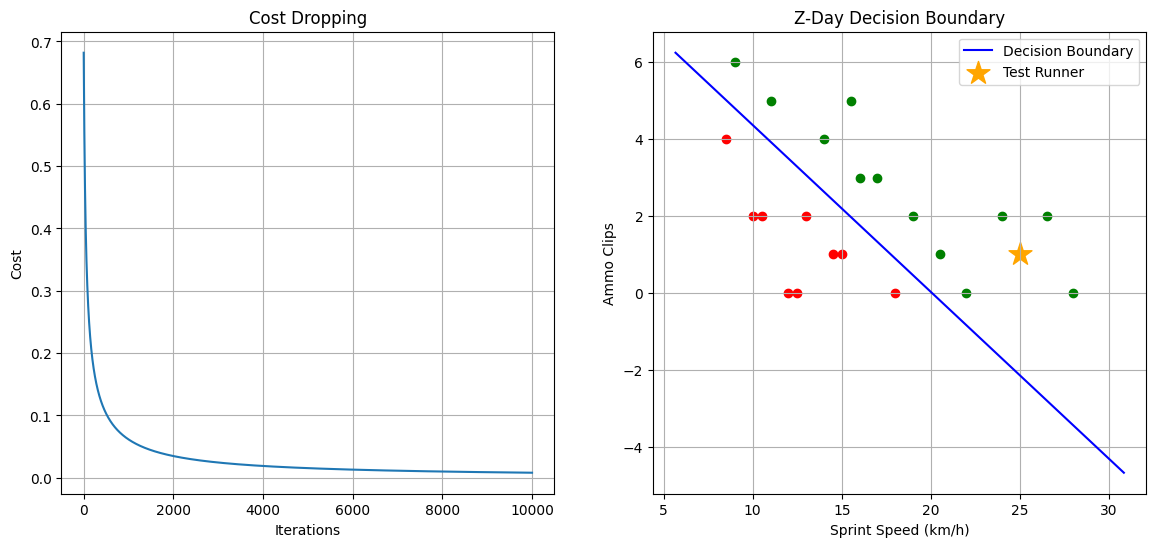

In [4]:
gdalgo_main(X_norm, y, 0.1, 10000)